In [1]:
import os, sys
from collections import defaultdict
import json
import random
from matplotlib import pyplot as plt

MODELS_DIR = {
    'aircraft': 'checkpoints/decathlon/aircraft/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned5',
    'cifar100': 'checkpoints/decathlon/cifar100/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned2',
    'daimlerpedcls': 'checkpoints/decathlon/daimlerpedcls/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned3',
    'dtd': 'checkpoints/decathlon/dtd/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned3',
    'gtsrb': 'checkpoints/decathlon/gtsrb/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned10',
    'vgg-flowers': 'checkpoints/decathlon/vgg-flowers/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned2',
    'omniglot': 'checkpoints/decathlon/omniglot/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned9',
    'svhn': 'checkpoints/decathlon/svhn/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned6',
    'ucf101': 'checkpoints/decathlon/ucf101/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned3',
}

# Select GPU id
GPU = 0

In [2]:
def extract_predictions(task):
    import torch.utils.data as data
    import dataloaders
    from models import student_resnet_wide
    import proj_utils
    
    # Dataset
    dataset = dataloaders.get_decathlon_dataset(task, ['test_stripped'])
    loader = data.DataLoader(dataset, batch_size=100, shuffle=False, num_workers=4, pin_memory=True)
    
    # Model
    model = student_resnet_wide.create_model(
            num_classes=dataset.num_classes, 
            max_skip=3,
            backbone='wide_resnet26'
        )
    proj_utils.load_checkpoint(model, model_dir=MODELS_DIR[task])
    model.to('cuda:1')
    model.eval()
    
    # Extract predictions
    image_ids, predictions = [], []
    for i, (images, labels, iids) in enumerate(loader):
        images, labels = images.to('cuda:1'), labels.to('cuda:1')
        logits, _ = model(images)
        image_ids += [iid.item() for iid in iids]
        predictions += [dataset.classes[dataset.category_ids[p]]['name'] for p in logits.max(1)[1].cpu().numpy()]
    
    del model
    return image_ids, predictions
    
def draw_predictions(task, iids, predictions):
    import dataloaders
    # Load dataset
    dataset = dataloaders.get_decathlon_dataset(task, ['test_stripped'])

    # Load predictions
    cls2images = defaultdict(list)
    for iid, p in zip(iids, predictions):
        cls2images[p].append(iid)

    labels = cls2images.keys()
    random.shuffle(labels)
    for lbl in labels[:10]:
        n_rows, n_cols, plt_width, plt_height = 1, 5, 2, 2
        f, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*plt_width, n_rows*plt_height))

        random.shuffle(cls2images[lbl])
        for i, iid in enumerate(cls2images[lbl][:5]):
            ax[i].imshow(plt.imread(dataset.id2img[iid]))
            ax[i].axis('off')
        ax[2].set_title(lbl)
        plt.tight_layout()
        plt.show()

### Aircraft

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
Loading checkpoint: checkpoints/decathlon/aircraft/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned5/checkpoint.pth.tar
 - Tensors loaded 292
 - Tensors ignored 0.

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


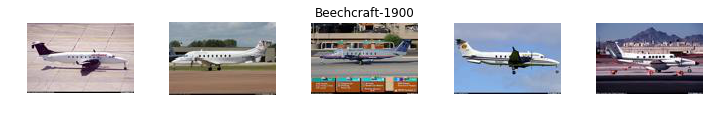

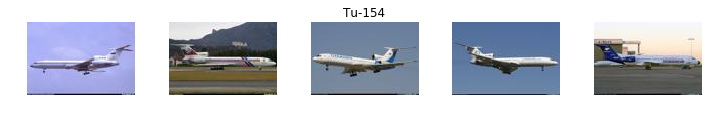

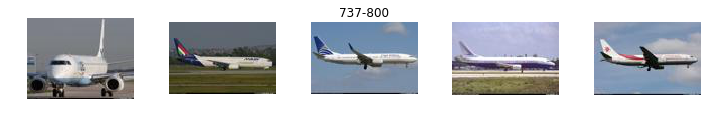

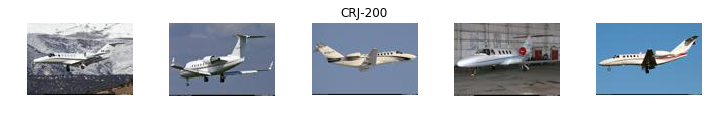

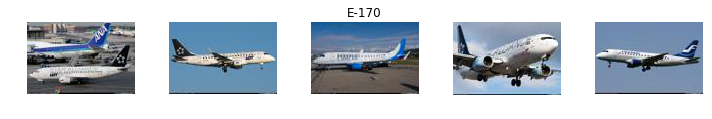

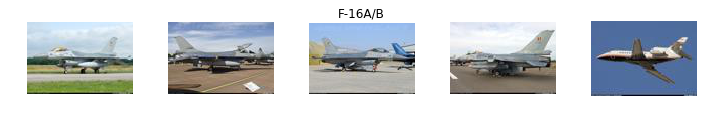

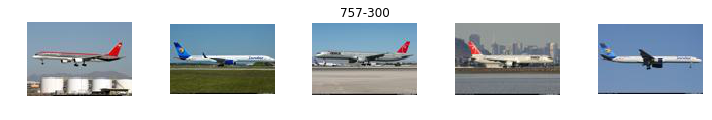

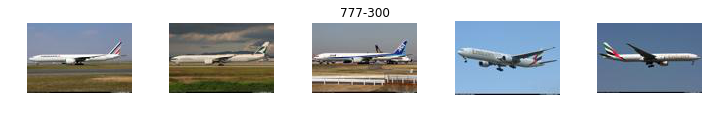

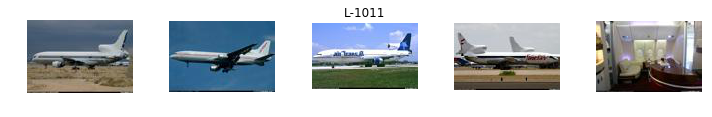

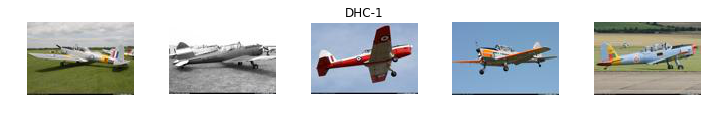

In [3]:
iids, predictions = extract_predictions('aircraft')
draw_predictions('aircraft', iids, predictions)

### CIFAR

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading checkpoint: checkpoints/decathlon/cifar100/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned2/checkpoint.pth.tar
 - Tensors loaded 292
 - Tensors ignored 0.

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


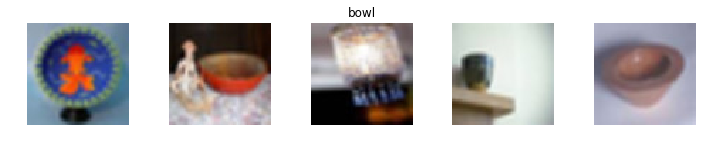

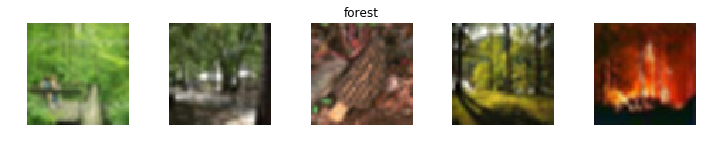

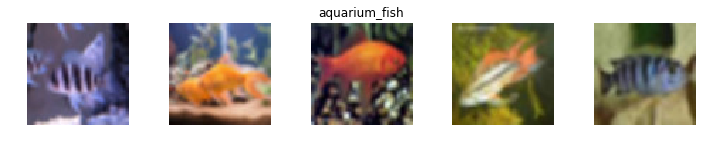

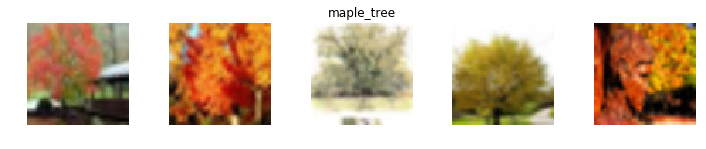

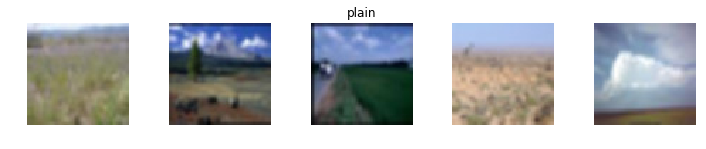

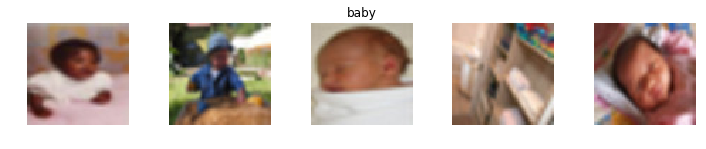

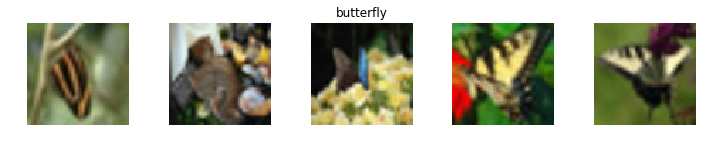

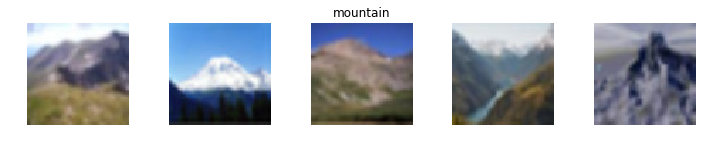

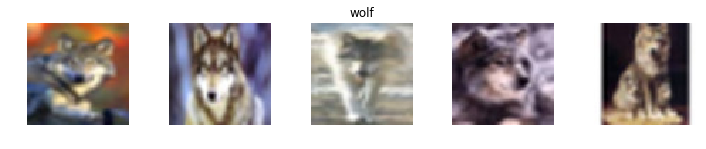

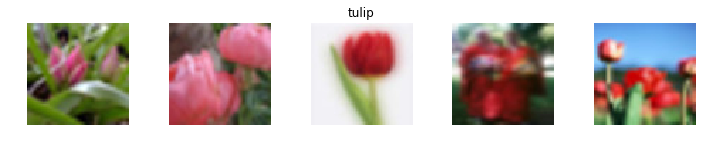

In [4]:
iids, predictions = extract_predictions('cifar100')
draw_predictions('cifar100', iids, predictions)

### Pedestrian

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!
Loading checkpoint: checkpoints/decathlon/daimlerpedcls/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned3/checkpoint.pth.tar
 - Tensors loaded 292
 - Tensors ignored 0.

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


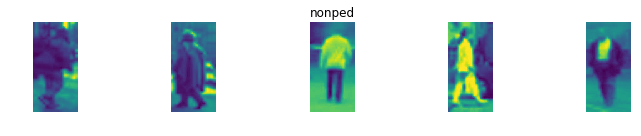

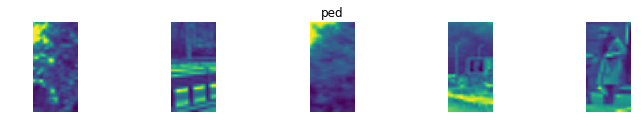

In [5]:
iids, predictions = extract_predictions('daimlerpedcls')
draw_predictions('daimlerpedcls', iids, predictions)

### Describable Textures

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading checkpoint: checkpoints/decathlon/dtd/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned3/checkpoint.pth.tar
 - Tensors loaded 292
 - Tensors ignored 0.

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


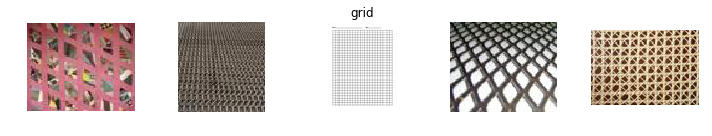

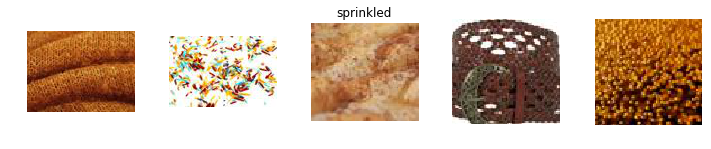

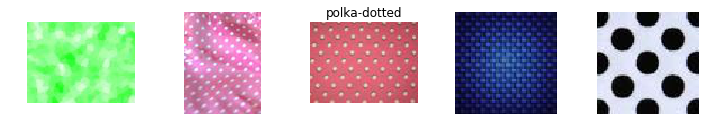

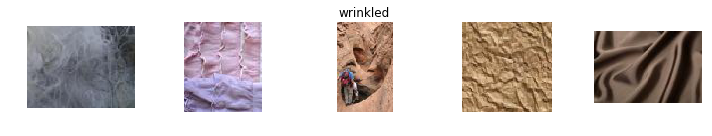

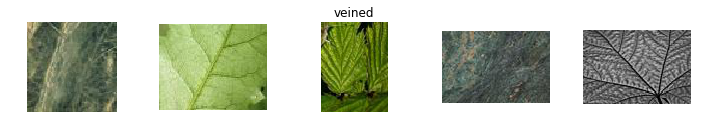

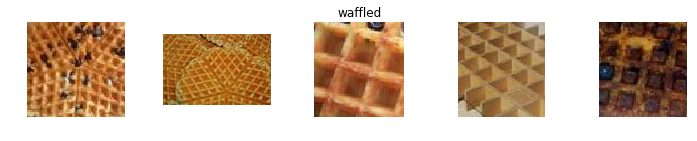

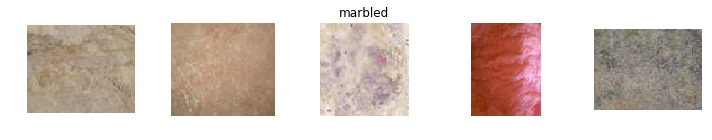

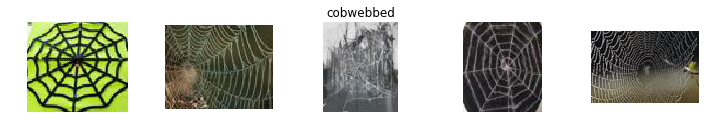

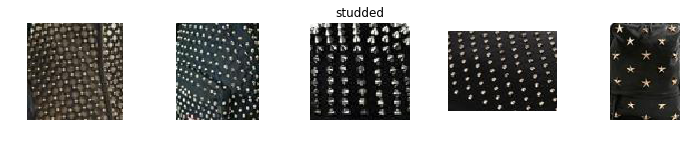

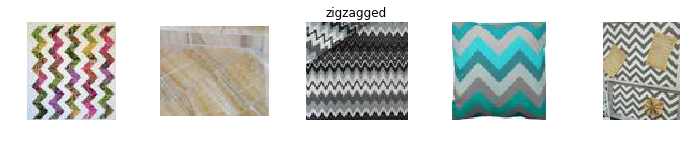

In [6]:
iids, predictions = extract_predictions('dtd')
draw_predictions('dtd', iids, predictions)

### Traffic Signs

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading checkpoint: checkpoints/decathlon/gtsrb/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned10/checkpoint.pth.tar
 - Tensors loaded 292
 - Tensors ignored 0.

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


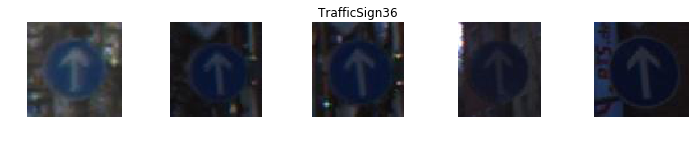

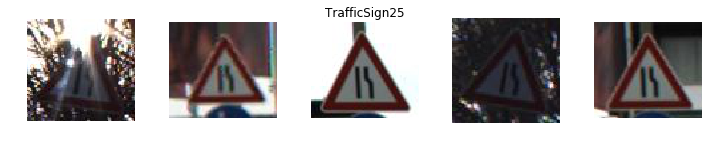

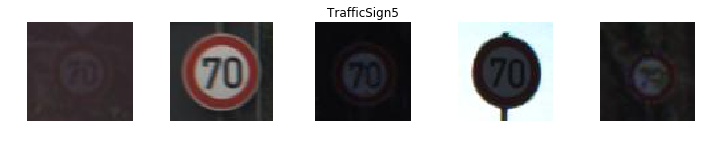

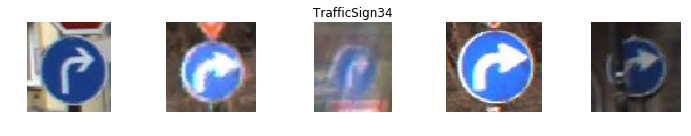

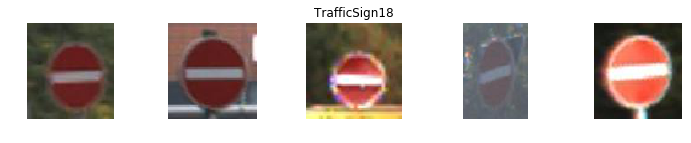

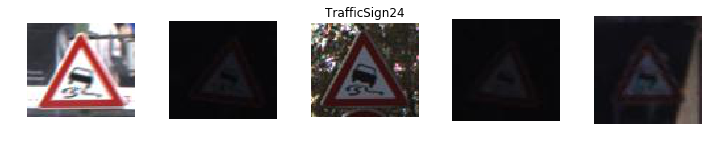

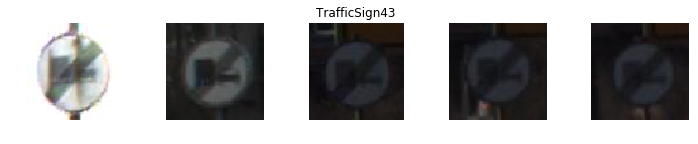

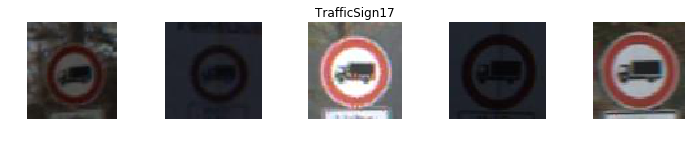

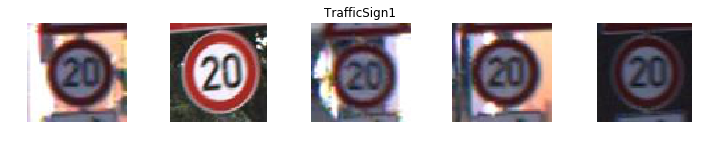

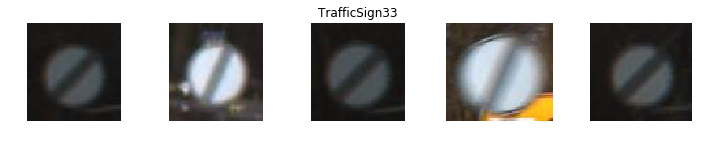

In [7]:
iids, predictions = extract_predictions('gtsrb')
draw_predictions('gtsrb', iids, predictions)

### Flowers

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading checkpoint: checkpoints/decathlon/vgg-flowers/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned2/checkpoint.pth.tar
 - Tensors loaded 292
 - Tensors ignored 0.

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


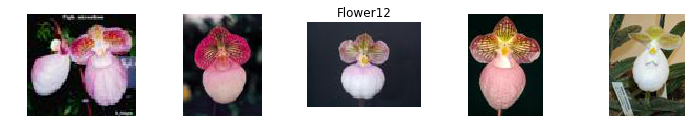

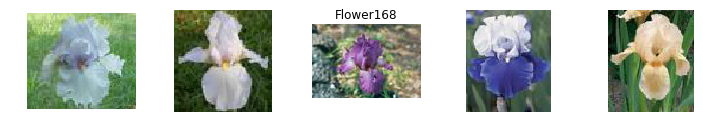

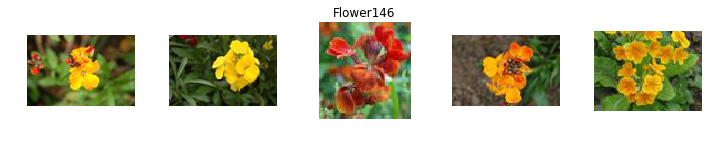

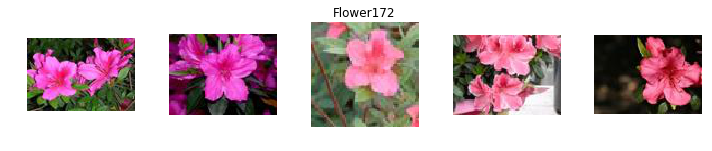

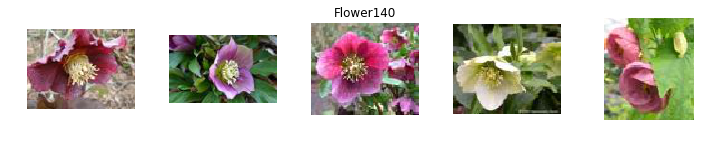

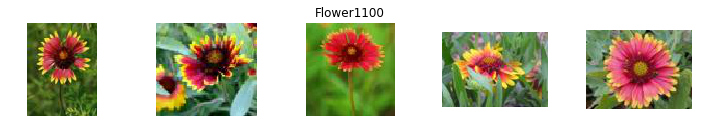

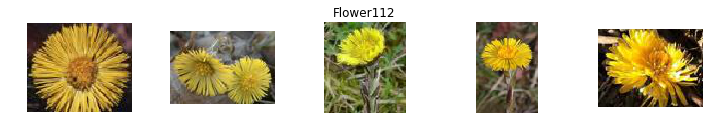

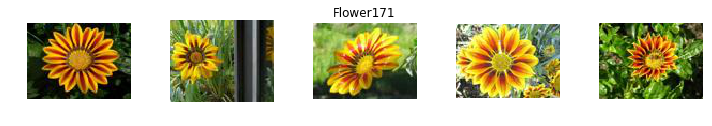

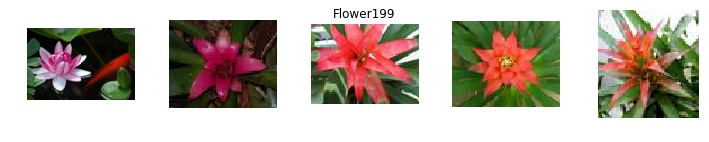

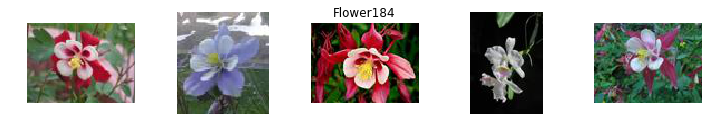

In [8]:
iids, predictions = extract_predictions('vgg-flowers')
draw_predictions('vgg-flowers', iids, predictions)

### Omniglot

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading checkpoint: checkpoints/decathlon/omniglot/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned9/checkpoint.pth.tar
 - Tensors loaded 292
 - Tensors ignored 0.

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


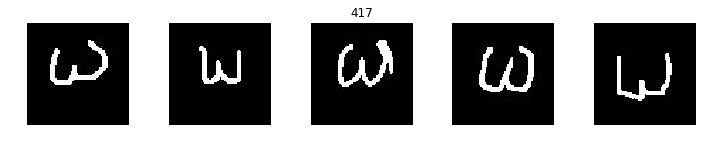

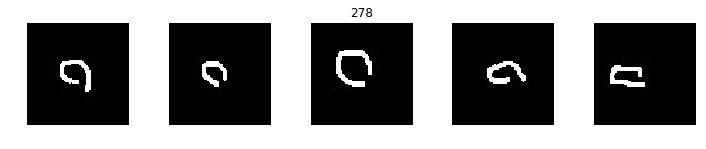

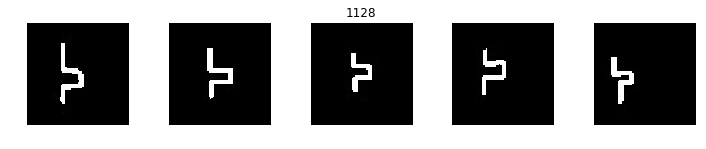

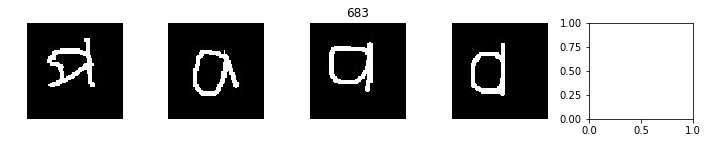

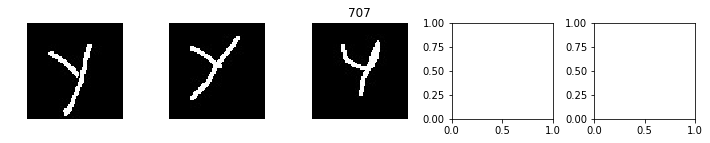

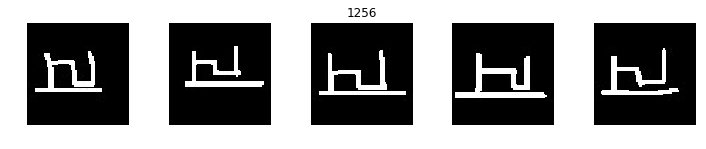

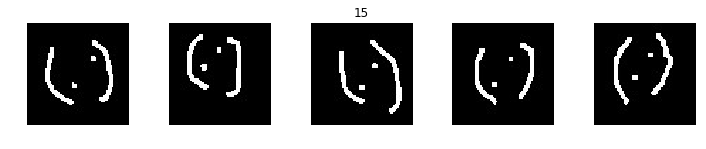

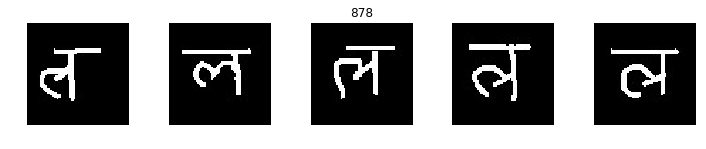

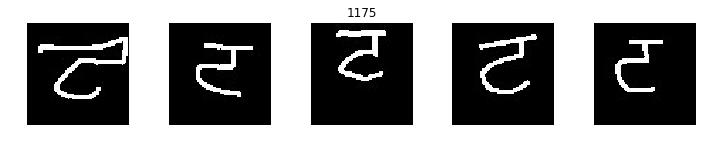

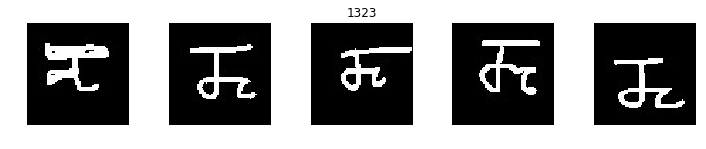

In [9]:
iids, predictions = extract_predictions('omniglot')
draw_predictions('omniglot', iids, predictions)

### Street View House Numbers

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
Loading checkpoint: checkpoints/decathlon/svhn/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned6/checkpoint.pth.tar
 - Tensors loaded 292
 - Tensors ignored 0.

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


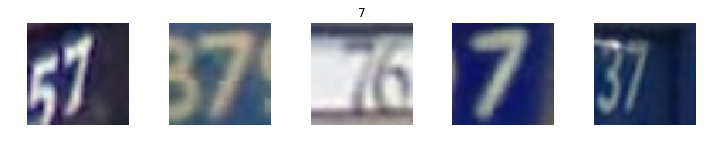

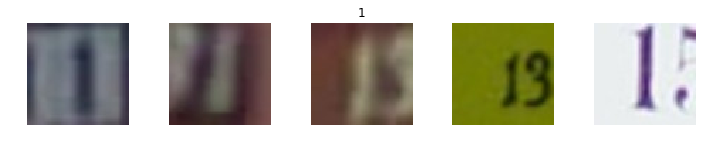

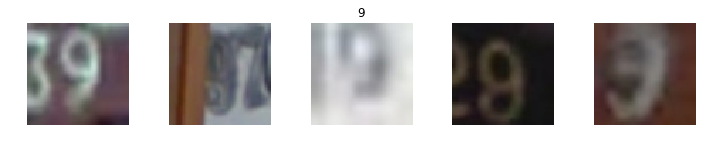

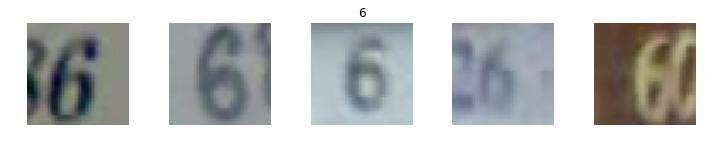

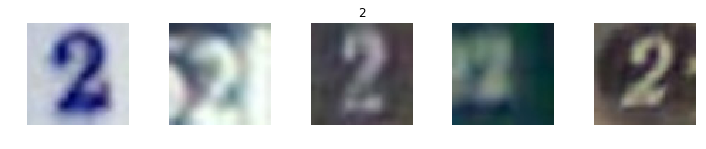

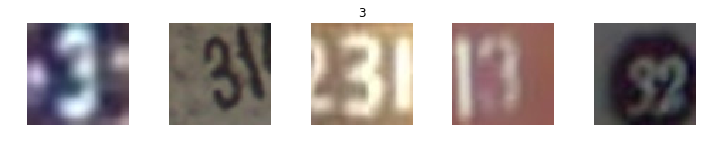

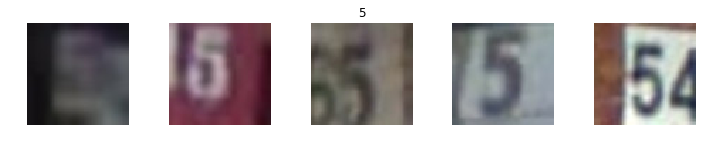

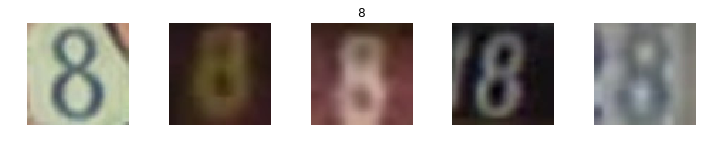

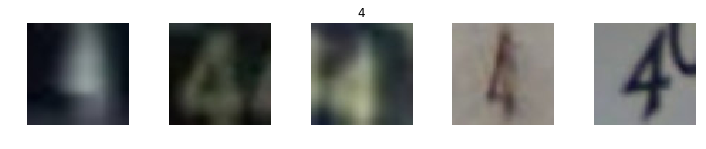

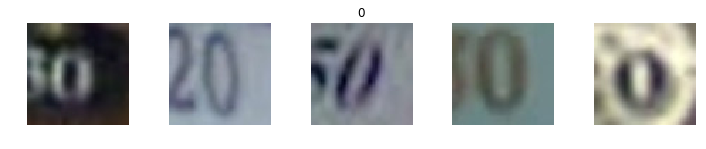

In [10]:
iids, predictions = extract_predictions('svhn')
draw_predictions('svhn', iids, predictions)

### UCF-101

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Loading checkpoint: checkpoints/decathlon/ucf101/nettailor-wide_resnet26-3Skip-T10.0-C1.0-Pruned3/checkpoint.pth.tar
 - Tensors loaded 292
 - Tensors ignored 0.

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


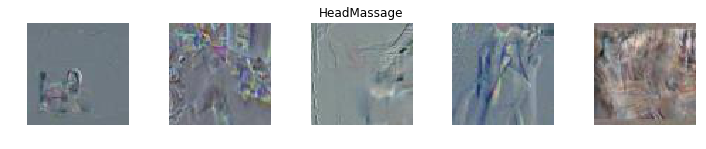

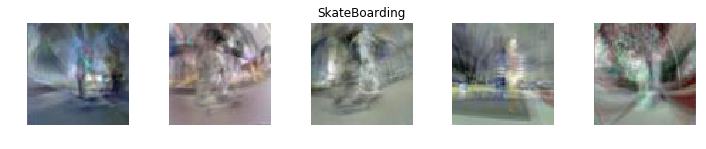

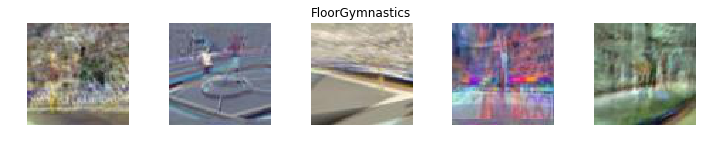

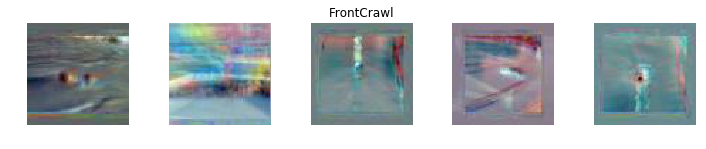

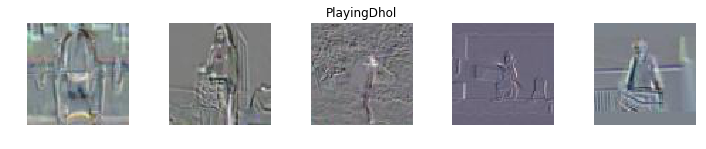

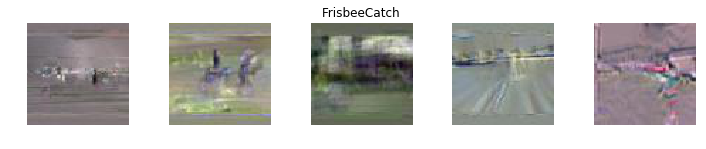

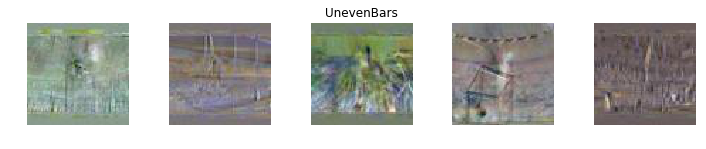

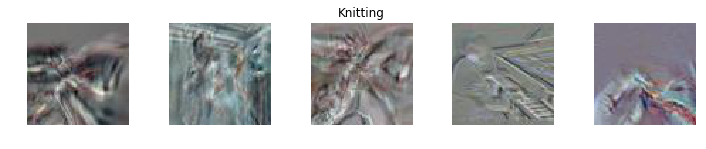

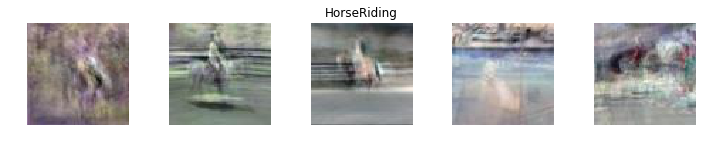

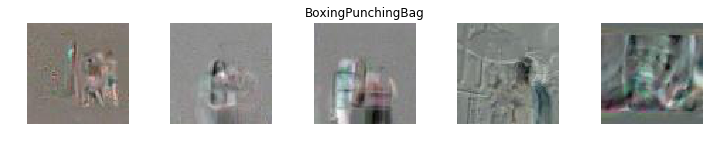

In [11]:
iids, predictions = extract_predictions('ucf101')
draw_predictions('ucf101', iids, predictions)